In [67]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))


import matplotlib.pyplot as plt
import torch

opj = os.path.join
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

from models.LearnableDWT.transform1d import wt_visual
from models.LearnableDWT.transform1d import DWT1DForward
import pywt
# params
wave = 'db3'
mode = 'periodic'
J = 4

# initialize 2d model

Parameter containing:
tensor([[[ 0.3327,  0.8069,  0.4599, -0.1350, -0.0854,  0.0352]]],
       device='cuda:0', requires_grad=True)
torch.Size([1, 1, 6])


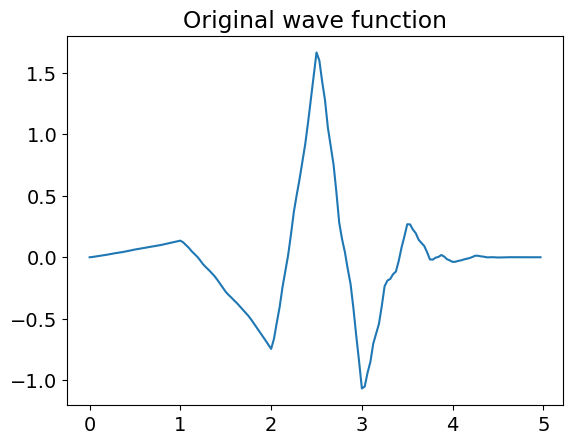

In [68]:
# initialize model
wt = DWT1DForward(wave=wave, mode=mode, J=J).to(device)
h0 = wt.h0
print(h0)
print(h0.shape)
# visualize
phi_orig, psi_orig, x_orig, wt = wt_visual(h0)
plt.plot(x_orig, psi_orig)
plt.title('Original wave function')
plt.show()

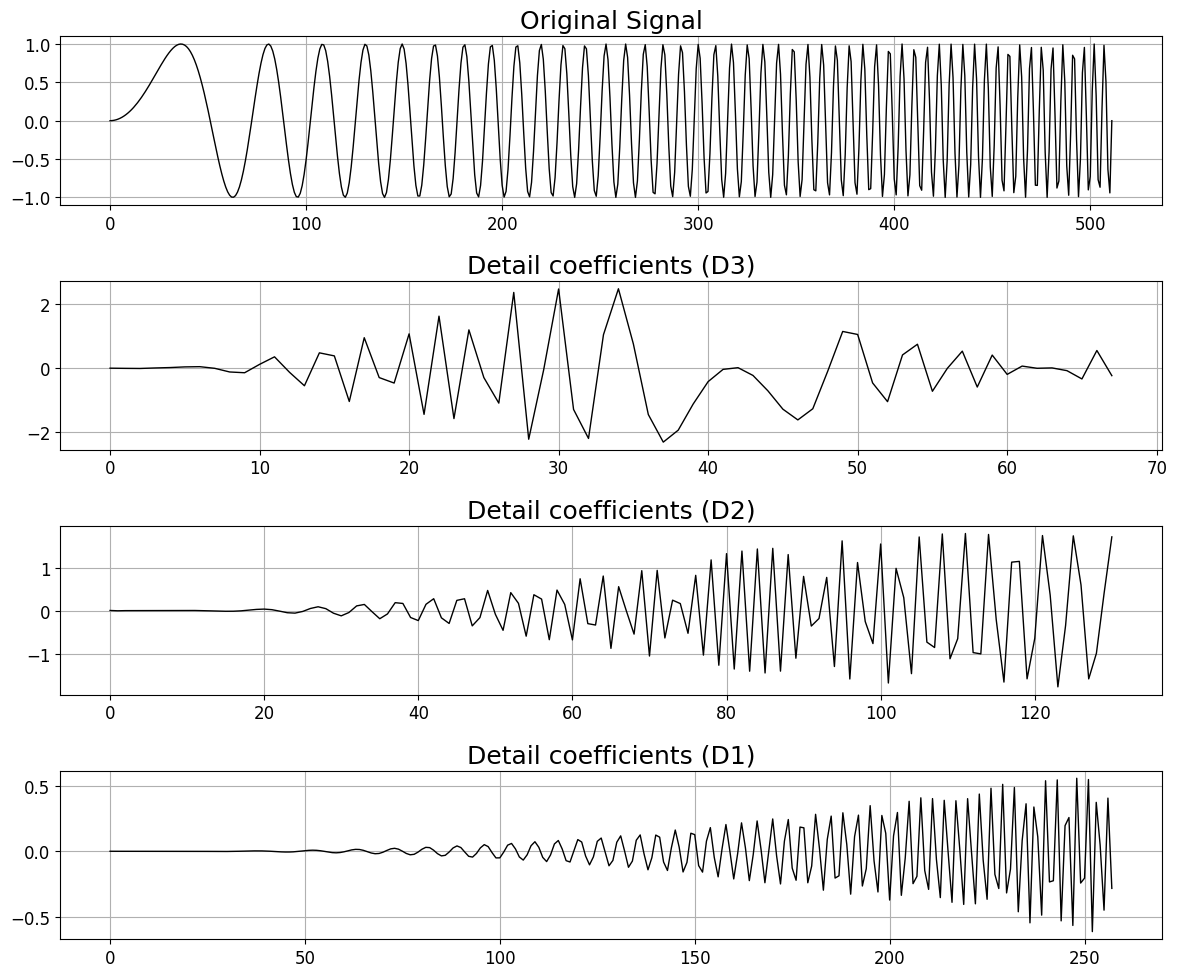

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

def plot_wavelet_decomposition(signal, wavelet, levels=3, save=False):
    """
    Plot only the wavelet decomposition sequence.
    
    Parameters:
    -----------
    signal : array-like
        Input signal to decompose
    wavelet : pywt.Wavelet
        Wavelet object to use for decomposition
    levels : int
        Number of decomposition levels
    """
    # Set the font size
    plt.rcParams.update({'font.size': 14})  # Increase base font size
    
    # Perform multilevel decomposition
    coeffs = pywt.wavedec(signal, wavelet, level=levels)
    
    # Create figure
    fig, axes = plt.subplots(levels + 1, 1, figsize=(12, 2*(levels+2)))
    
    # Plot original signal
    axes[0].plot(signal, color='black', linewidth=1)
    axes[0].set_title('Original Signal', fontsize=18)
    axes[0].grid(True)
    axes[0].tick_params(labelsize=12)  # Increase tick label size
    
    # Plot details
    for i in range(levels):
        axes[i+1].plot(coeffs[i+1], color='black', linewidth=1)
        axes[i+1].set_title(f'Detail coefficients (D{levels-i})', fontsize=18)
        axes[i+1].grid(True)
        axes[i+1].tick_params(labelsize=12)  # Increase tick label size
    
    plt.tight_layout()
    if save:
        plt.savefig('Wavelet_decomposition.png', dpi=300, bbox_inches='tight')
    
    plt.show()
   

# Create a sample signal
t = np.linspace(0, 1, 512)
signal = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*50*t) + np.random.normal(0, 0.1, len(t))

# Plot decomposition
#plot_wavelet_decomposition(signal, wavelet=wt, levels=3)

# Optional: Try with different test signals
# Square wave
# square_signal = np.sign(np.sin(2*np.pi*5*t))
# plot_wavelet_decomposition(square_signal, wt, levels=3)

# # Chirp signal
chirp_signal = np.sin(2*np.pi*t*50*t)
plot_wavelet_decomposition(chirp_signal, wt, levels=3)

# load bio data
For larger data, can use a dataloader rather than just an array

/tmp/ipykernel_5339/1031264735.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(f'../saved_models/model_{data_name}_generate_uncond_v2.pt')


energy h0 shape: torch.Size([1, 1, 6])
exchange_rate h0 shape: torch.Size([1, 1, 6])
ETTh1 h0 shape: torch.Size([1, 1, 6])
weather h0 shape: torch.Size([1, 1, 6])


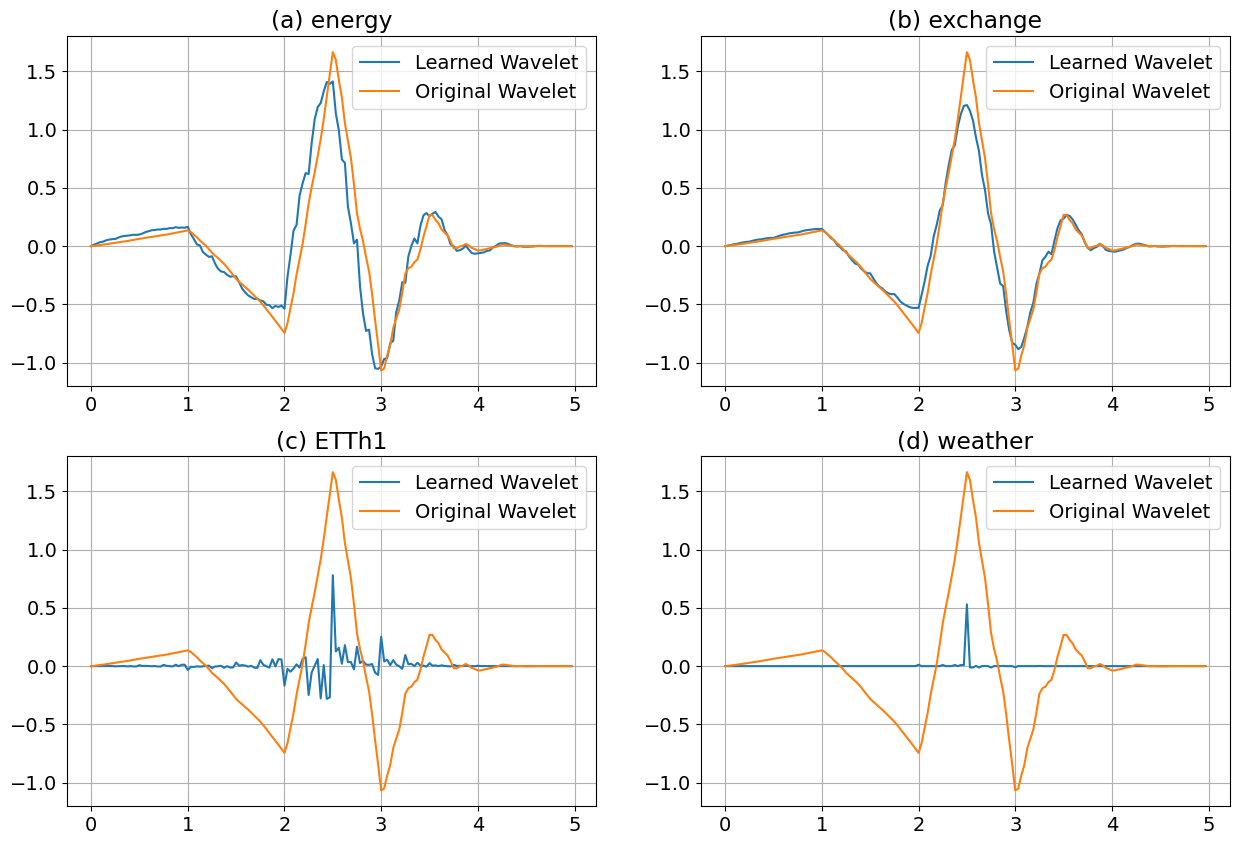

energy h0 shape: torch.Size([1, 1, 6])
exchange_rate h0 shape: torch.Size([1, 1, 6])
ETTh1 h0 shape: torch.Size([1, 1, 6])
weather h0 shape: torch.Size([1, 1, 6])


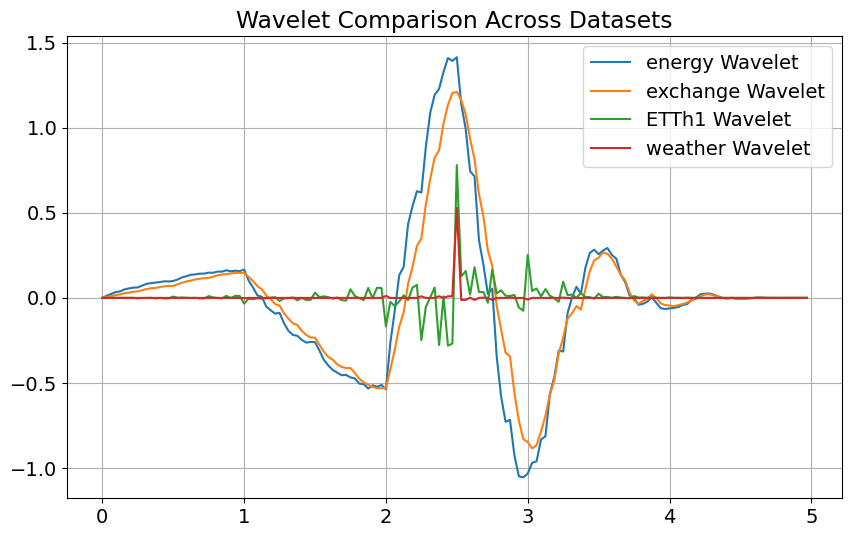

In [116]:
import torch
import matplotlib.pyplot as plt

# Function to load model and get wavelet data
def load_wavelet_data(data_name):
    checkpoint = torch.load(f'../saved_models/model_{data_name}_generate_uncond_v2.pt')
    h0 = checkpoint['model_state_dict']['score_model.season_block.wavelet_module.wt.h0']
    print(f"{data_name} h0 shape:", h0.shape)
    return wt_visual(h0)

# Create subplots in 2x2 grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Dataset names
datasets = ['energy', 'exchange_rate', 'ETTh1', 'weather']
axes = [ax1, ax2, ax3, ax4]
subplot_labels = ['(a)', '(b)', '(c)', '(d)']

# Plot for each dataset
for ax, data_name, label in zip(axes, datasets, subplot_labels):
    try:
        # Load and process data
        phi, psi, x, wt_x = load_wavelet_data(data_name)
        
        # Plot wavelet functions
        ax.plot(x, psi, label='Learned Wavelet')
        ax.plot(x_orig, psi_orig, label='Original Wavelet')
        
        # Customize plot
        ax.grid(True)
        ax.legend()
        if data_name == 'exchange_rate':
            data_name = 'exchange'
        ax.set_title(f'{label} {data_name}')
        
    except Exception as e:
        print(f"Error processing {data_name}: {str(e)}")
        ax.text(0.5, 0.5, f'Error loading {data_name}', 
                ha='center', va='center')
        ax.set_title(f'{label} {data_name} (failed)')

# Adjust layout
#plt.tight_layout()

# Save figure
plt.savefig('wavelet_visual_comparison.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none')
plt.show()

# Optional: Create separate overlay comparison plot
plt.figure(figsize=(10, 6))
for data_name in datasets:
    try:
        phi, psi, x, wt_x = load_wavelet_data(data_name)
        if data_name == 'exchange_rate':
            data_name = 'exchange'
        plt.plot(x, psi, label=f'{data_name} Wavelet')
    except Exception as e:
        print(f"Error in overlay plot for {data_name}: {str(e)}")

plt.grid(True)
plt.legend()
plt.title('Wavelet Comparison Across Datasets')
plt.savefig('wavelet_overlay_comparison.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none')
plt.show()

/tmp/ipykernel_5339/2074272490.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(f'../saved_models/model_{data_name}_generate_uncond_v2_2wavelet.pt

Parameter containing:
tensor([[[ 0.3327,  0.8069,  0.4599, -0.1350, -0.0854,  0.0352]]],
       device='cuda:0', requires_grad=True)
tensor([[[ 0.0094,  1.6483,  0.1860, -0.0826,  0.4903, -0.0171]]],
       device='cuda:0')
tensor([[[ 0.0007,  0.2333,  0.0264, -0.0123,  0.0701, -0.0022]]],
       device='cuda:0')


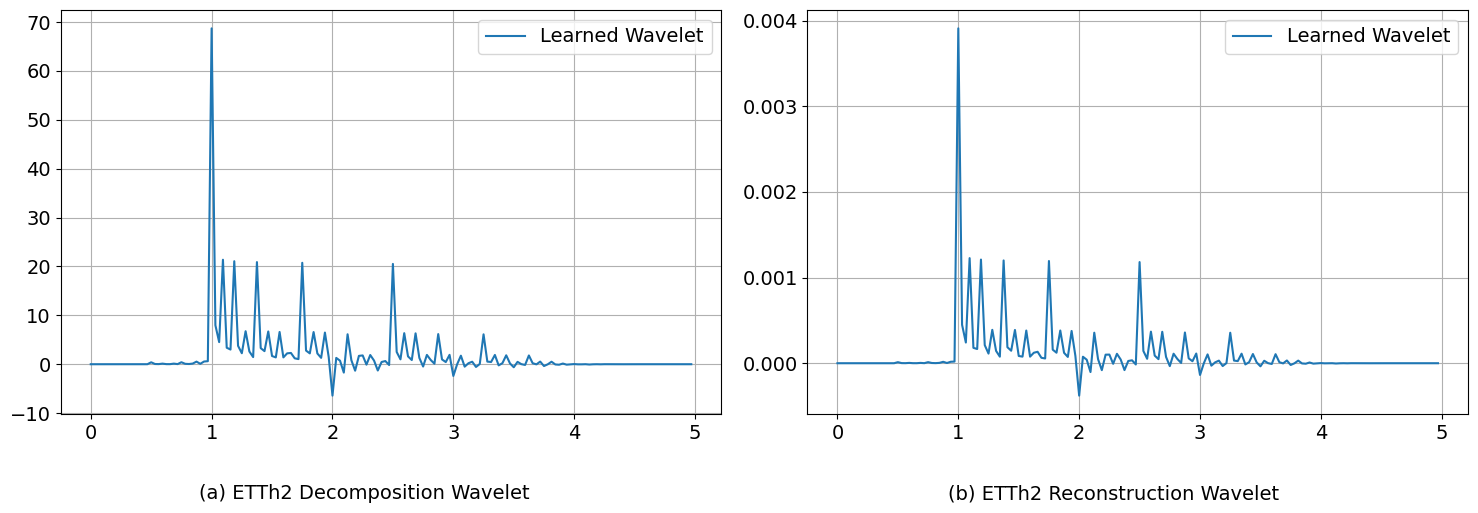

In [122]:
data_name = 'ETTh2'
checkpoint = torch.load(f'../saved_models/model_{data_name}_generate_uncond_v2_2wavelet.pt')
h0_ex = checkpoint['model_state_dict']['score_model.season_block.wavelet_module.dwt.h0']
print(h0)
phi_h0_ex, psi_h0_ex, x_h0_ex, wt_x_ex = wt_visual(h0_ex)
print(h0_ex)
checkpoint = torch.load(f'../saved_models/model_{data_name}_generate_uncond_v2_2wavelet.pt')
h0_we = checkpoint['model_state_dict']['score_model.season_block.wavelet_module.idwt.g0']
print(h0_we)
phi_h0_we, psi_h0_we, x_h0_we, wt_x_we = wt_visual(h0_we)

# Create a figure with two subplots in a row
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# First subplot
ax1.plot(x_h0_ex, phi_h0_ex, label='Learned Wavelet')
ax1.grid(True)
ax1.legend()


# Second subplot
ax2.plot(x_h0_we, phi_h0_we, label='Learned Wavelet')
ax2.grid(True)
ax2.legend()


# Add labels below subplots
fig.text(0.25, -0.02, '(a) ETTh2 Decomposition Wavelet', ha='center')
fig.text(0.75, -0.02, '(b) ETTh2 Reconstruction Wavelet', ha='center')

# Adjust layout to prevent overlap
plt.tight_layout()
# Add padding at the bottom for the labels
plt.subplots_adjust(bottom=0.15)
plt.savefig('Wavelet_ablation.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none')
plt.show()

torch.Size([1, 1, 6])


/tmp/ipykernel_5339/3105607606.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(f'../saved_models/model_{data_name}_generate_uncond_v2.pt')


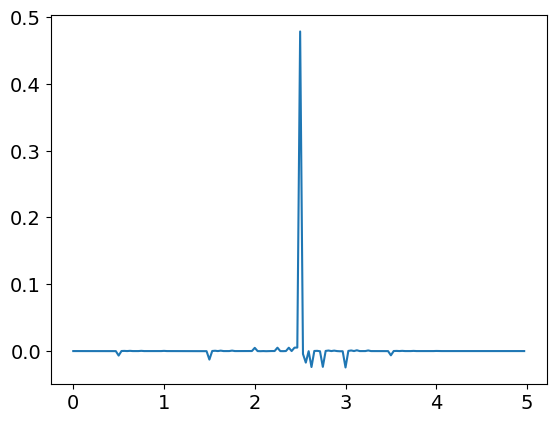

In [ ]:
data_name = 'ETTh2'
checkpoint = torch.load(f'../saved_models/model_{data_name}_generate_uncond_v2.pt')
h0_we = checkpoint['model_state_dict']['score_model.season_block.wavelet_module.wt.h0']
print(h0.shape)
phi_h0_we, psi_h0_we, x_h0_we, wt_x_we = wt_visual(h0_we)

# Create a figure with two subplots in a row

# First subplot
plt.plot(x_h0_we, psi_h0_we, label='Learned Scaling')
#plt.plot(x_orig, psi_orig, label='Original Scaling')

plt.show()

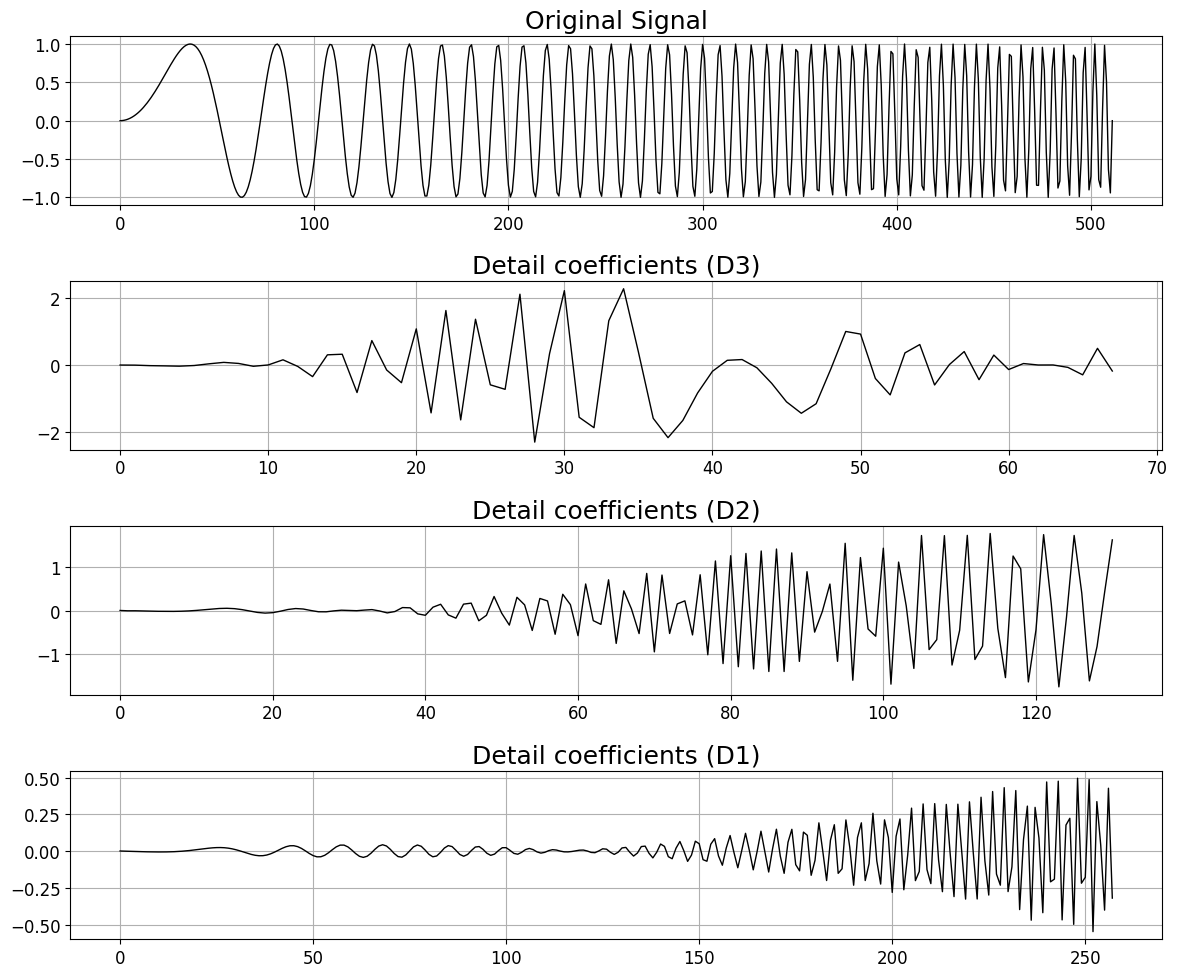

In [ ]:
#plot_wavelet_decomposition(signal, wavelet=wt, levels=3)

# Optional: Try with different test signals
# Square wave
# square_signal = np.sign(np.sin(2*np.pi*5*t))
# plot_wavelet_decomposition(square_signal, wt, levels=3)

# Chirp signal
chirp_signal = np.sin(2*np.pi*t*50*t)
plot_wavelet_decomposition(chirp_signal, wt_x, levels=3, save=True)

In [ ]:
# phi_g0, psi_g0, x_g0 = wt_visual(g0)
# plt.plot(x_g0, psi_g0)
# print(x_h0.shape)
# print(x_orig.shape)